# Homework 12

https://scikit-learn.org/0.15/modules/scaling_strategies.html#incremental-learning

* Implement a mini batch functionality to train a regressor.
    - (Optional) If anyone want to do this in a pipeline can do this: https://koaning.github.io/tokenwiser/api/pipeline.html

* Save model, load the model again and test it on `X_test` __Do NOT commit the pickle file__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def test_df():
    df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)

    df = df.sample(5000, random_state=100).reset_index(drop=True)
    
    y = df['sellingprice']
    df.drop('sellingprice', axis=1, inplace=True)
    X = df
    
    return X,y

def partial_df():
    df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)
   
    while(True):
        yield df.sample(100).reset_index(drop=True)
        
gen = partial_df()

In [3]:
X_test, y_test = test_df()

In [4]:
# each time you call this you will get a new slice of the dataframe.
data=next(gen)

In [5]:
data

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2010,Buick,Enclave,CXL1,suv,automatic,5galvbed7aj248183,mn,3.5,71061.0,black,tan,wheel way gm,18100,18900,Thu Jun 04 2015 03:30:00 GMT-0700 (PDT)
1,2010,Chevrolet,Camaro,1LT,Coupe,automatic,2g1fb1ev8a9198082,fl,3.4,55312.0,green,black,suntrust bank,14750,13900,Wed Jan 21 2015 01:10:00 GMT-0800 (PST)
2,2012,Nissan,Altima,2.5 S,sedan,automatic,1n4al2ap7cc245406,il,3.1,43614.0,gray,gray,nissan-infiniti lt,11050,11000,Thu Jun 11 2015 03:00:00 GMT-0700 (PDT)
3,2006,Volkswagen,Passat,2.0T,Sedan,automatic,wvwak93c86p204344,fl,2,145174.0,blue,—,capital auto auction,3275,3100,Tue Mar 03 2015 01:00:00 GMT-0800 (PST)
4,2009,Honda,Civic,Hybrid,Sedan,automatic,jhmfa36259s007480,la,3.7,84425.0,blue,gray,neighbors fcu,7400,7200,Wed Jan 21 2015 03:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2001,Mitsubishi,Galant,ES,Sedan,automatic,4a3aa46g41e074679,oh,1.9,182325.0,white,gray,dt inventory,825,750,Thu Feb 26 2015 01:00:00 GMT-0800 (PST)
96,2006,Ford,Explorer,Eddie Bauer,SUV,automatic,1fmeu64e76ua33934,tx,2.9,148555.0,blue,brown,wells fargo dealer services,5025,4500,Mon Dec 22 2014 10:00:00 GMT-0800 (PST)
97,2013,Dodge,Grand Caravan,SE,Minivan,NaN,2c4rdgbg1dr723611,fl,3.4,37554.0,red,gray,ez rent a car inc,13400,12300,Tue Feb 03 2015 01:00:00 GMT-0800 (PST)
98,2008,Cadillac,Escalade ESV,Base,suv,NaN,1gyfk668x8r247130,nc,2.5,118820.0,white,—,hendrick chrysler jeep,19000,22000,Mon Jun 15 2015 02:15:00 GMT-0700 (PDT)


In [6]:
y = data['sellingprice']
data.drop('sellingprice', axis=1, inplace=True)
X = data

In [7]:
data.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'saledate'],
      dtype='object')

In [8]:
data.head(1)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,saledate
0,2010,Buick,Enclave,CXL1,suv,automatic,5galvbed7aj248183,mn,3.5,71061.0,black,tan,wheel way gm,18100,Thu Jun 04 2015 03:30:00 GMT-0700 (PDT)


In [9]:
num_vars=['year','odometer']
cat_vars=['make','model','trim','body','transmission','state','color','interior','seller','saledate','vin','condition','mmr']

In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [11]:
from sklearn.preprocessing import LabelEncoder
for feature in cat_vars:
    X[feature] = label_encoder.fit_transform(X[feature])

In [12]:
X.fillna(0,inplace=True)

In [13]:
X.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
saledate        0
dtype: int64

In [14]:
from sklearn.linear_model import SGDRegressor

sgd_lm = SGDRegressor(fit_intercept=False,
                      alpha=0, 
                      eta0=0.01, 
                      power_t=.05, 
                      learning_rate='adaptive'
                     )

## Implementing mini batch functionality

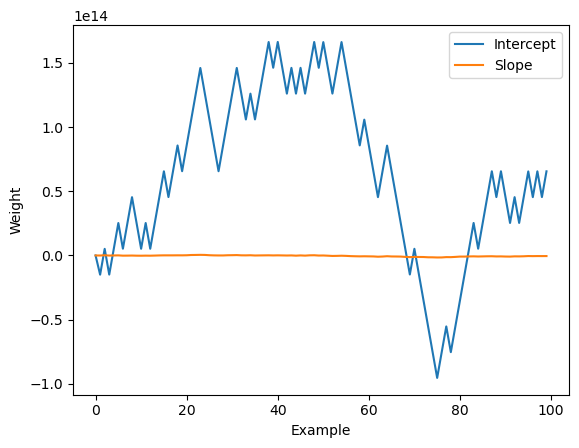

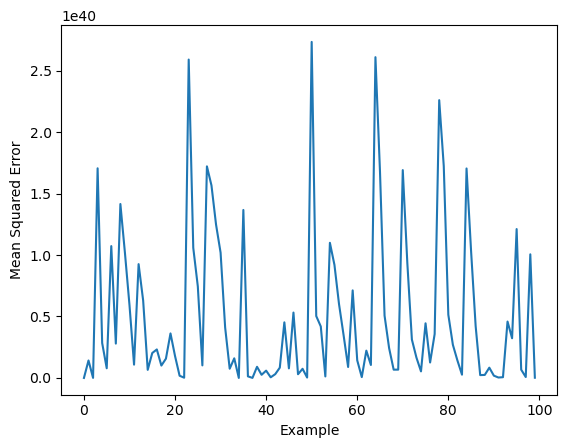

In [15]:
samples = X.shape[0]

coefs = list()
mses = list()

for i in range(samples):
    sgd_lm = sgd_lm.partial_fit(X[i:i+1], y[i:i+1].ravel())

    b = sgd_lm.coef_[0]
    m = sgd_lm.coef_[1]
    coefs.append((b, m))
    
    yhat = sgd_lm.predict(X)
    mse = ((y - yhat)**2).mean()
    mses.append(mse)

plt.plot(range(samples), [x[0] for x in coefs])
plt.plot(range(samples), [x[1] for x in coefs])
plt.legend(['Intercept', 'Slope'])
plt.xlabel('Example')
plt.ylabel('Weight')
plt.show()

plt.plot(range(samples), mses)
plt.xlabel('Example')
plt.ylabel('Mean Squared Error')
plt.show()

In [16]:
for feature in cat_vars:
    X_test[feature] = label_encoder.fit_transform(X_test[feature])

In [17]:
X_test.fillna(0,inplace=True)

## Saving the model

In [25]:
import joblib

joblib.dump(sgd_lm, 'pipeline.pkl')

['pipeline.pkl']

## Loading the model again and testing on test data

In [26]:
pipeline = joblib.load('pipeline.pkl')
pipeline

SGDRegressor(alpha=0, fit_intercept=False, learning_rate='adaptive',
             power_t=0.05)

In [28]:
Y_predicted = pipeline.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error
import math
print("Mean Squared Error(MSE):", mean_squared_error(y_test, Y_predicted))
print("Root Mean Squared Error(RMSE): ", math.sqrt(mean_squared_error(y_test, Y_predicted)))

Mean Squared Error(MSE): 1.521304063718423e+37
Root Mean Squared Error(RMSE):  3.900389805799445e+18


In [31]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error(MAE):", mean_absolute_error(y_test, Y_predicted))

Mean Absolute Error(MAE): 3.1348921668074813e+18
